# Projet Data Mining :

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset2.csv to Dataset2.csv


# Load the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_csv("Dataset2.csv")
dataset

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,5/30/2021,6/19/2021,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,3/28/2021,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2/6/2022,2/26/2022,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,6/20/2021,7/10/2021,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,1-May,21-May,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,24-Jul,13-Aug,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,12-Jun,2-Jul,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,28-Jun,18-Jul,53.0,1379.0,61.0,10.9,282.8,4.4


# Analyse de dataset :

In [ ]:
dataset_description = {}
dataset_description["Nombre de lignes"] = dataset.shape[0]
dataset_description["Nombre de colonnes"] = dataset.shape[1]
dataset_description["Type de donnees"] = list(map(str, dataset.dtypes.unique().tolist()))
pd.DataFrame.from_dict(dataset_description, orient='index', columns = [""])

,
Nombre de lignes,337
Nombre de colonnes,11
Type de donnees,"[int64, object, float64]"


In [ ]:
colonnes_description = []
for d in dataset:
    colonnes_description.append([d, dataset[d].count(), str(dataset.dtypes[d]), len(dataset[d].unique())])
pd.DataFrame(colonnes_description, columns = ["Nom","Valeur non null","Type", "Nombre de valeur unique"])

,Nom,Valeur non null,Type,Nombre de valeur unique
0,zcta,337,int64,7
1,time_period,337,int64,51
2,population,337,int64,7
3,Start date,337,object,99
4,end date,337,object,99
5,case count,311,float64,205
6,test count,325,float64,321
7,positive tests,310,float64,210
8,case rate,337,float64,209
9,test rate,337,float64,323


We have missing values in : Case Count , Test Count , Positive Tests . and population_tests_ratio all of the values are numerical so we can deal with the missing values using the median / class median


Zip codes of the countries concerned :

In [ ]:
print(dataset["zcta"].unique())

[95129 95128 95127 95035 94087 94086 94085]


dates are inserted in different way in last records , we should fix it based on the time period .

In [ ]:
dataset_sorted = dataset.sort_values(by=dataset.columns[1])
dataset_sorted

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
73,95128,18,36975,12/22/2019,1/11/2020,0.0,NaN,NaN,0.0,0.3,0.0
260,94086,18,50477,22-Dec,11-Jan,0.0,NaN,NaN,0.0,0.1,0.0
112,95127,18,66256,12/22/2019,1/11/2020,0.0,NaN,NaN,0.0,0.1,0.0
314,94085,18,23223,22-Dec,11-Jan,0.0,NaN,NaN,0.0,0.2,100.0
27,95129,19,39741,1/12/2020,2/1/2020,0.0,NaN,NaN,0.0,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
127,95127,67,66256,10/16/2022,11/5/2022,40.0,1276.0,49.0,2.9,91.7,3.8
61,95128,67,36975,10/16/2022,11/5/2022,14.0,803.0,20.0,1.8,103.4,2.5
245,94086,67,50477,16-Oct,5-Nov,39.0,984.0,41.0,3.7,92.8,4.2
172,95035,67,79655,10/16/2022,11/5/2022,86.0,1392.0,106.0,5.1,83.2,7.6


## Attributs Tendencies :

Quartiles

In [ ]:
import pandas as pd
from prettytable import PrettyTable

def calculate_quartiles(column):
    return dataset[column].quantile([0, 0.25, 0.5, 0.75, 1])

def mean_column(column):
    return dataset[column].mean()

def mode_column(column):
    return dataset[column].mode().iloc[0]  # Get the first mode if it exists

def median_column(column):
    return dataset[column].median()


In [ ]:
def calculate_measures(column):
    mean_val = mean_column(column)
    median_val = median_column(column)
    mode_val = mode_column(column)
    max_val = dataset[column].max()
    min_val = dataset[column].min()
    quartiles = calculate_quartiles(column)

    return mean_val, median_val, mode_val, max_val, min_val, *quartiles

def calculate_table():
    columns_of_interest = ['case count', 'test count', 'positive tests', 'case rate', 'test rate', 'positivity rate']

    table = PrettyTable()
    table.field_names = ["Attribute", "Mean", "Median", "Mode", "Max", "Min", "Q0", "Q1", "Q2", "Q3", "Q4"]

    for column in columns_of_interest:
        measures = calculate_measures(column)
        table.add_row([column] + [round(val, 2) if not pd.isna(val) else val for val in measures])

    return table

result_table = calculate_table()
print(result_table)

+-----------------+---------+--------+--------+---------+------+------+--------+--------+--------+---------+
|    Attribute    |   Mean  | Median |  Mode  |   Max   | Min  |  Q0  |   Q1   |   Q2   |   Q3   |    Q4   |
+-----------------+---------+--------+--------+---------+------+------+--------+--------+--------+---------+
|    case count   |  225.99 |  91.0  |  0.0   |  3627.0 | 0.0  | 0.0  |  39.5  |  91.0  | 235.0  |  3627.0 |
|    test count   | 4938.12 | 4352.0 | 1295.0 | 20177.0 | 11.0 | 11.0 | 2428.0 | 4352.0 | 6659.0 | 20177.0 |
|  positive tests |  380.2  | 108.5  |  20.0  | 35000.0 | 11.0 | 11.0 | 47.25  | 108.5  | 282.0  | 35000.0 |
|    case rate    |  19.39  |  8.1   |  0.0   |  260.7  | 0.0  | 0.0  |  3.3   |  8.1   |  19.1  |  260.7  |
|    test rate    |  454.84 | 427.1  |  0.1   |  1615.1 | 0.1  | 0.1  | 249.7  | 427.1  | 614.9  |  1615.1 |
| positivity rate |   5.83  |  3.0   |  1.1   |  100.0  | 0.0  | 0.0  |  1.3   |  3.0   |  6.6   |  100.0  |
+-----------------+

# Preprocessing of the dataset :

# Correlation between Time period and start/end year

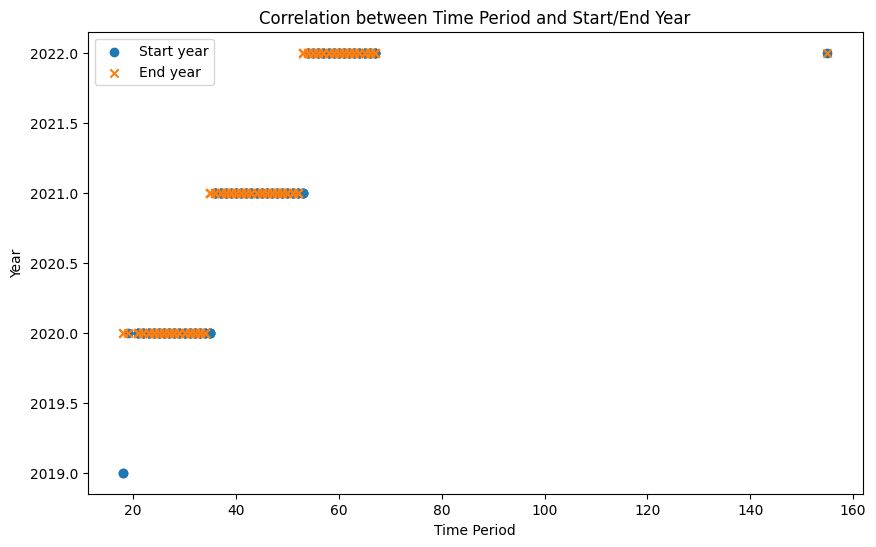

In [ ]:
dataset['Start date'] = pd.to_datetime(dataset['Start date'], format='%m/%d/%Y', errors='coerce')
dataset['end date'] = pd.to_datetime(dataset['end date'], format='%m/%d/%Y',errors='coerce')

plt.figure(figsize=(10, 6))
plt.scatter(dataset['time_period'], dataset['Start date'].dt.year, label='Start year', marker='o')
plt.scatter(dataset['time_period'], dataset['end date'].dt.year, label='End year', marker='x')
plt.xlabel('Time Period')
plt.ylabel('Year')
plt.title('Correlation between Time Period and Start/End Year')
plt.legend()
plt.show()

In [ ]:
correlation_start_year = dataset['time_period'].corr(dataset['Start date'].dt.year)

# Calculate the correlation between "time_period" and the year extracted from "end date"
correlation_end_year = dataset['time_period'].corr(dataset['end date'].dt.year)

# Print the results
print(f"Correlation between Time Period and Start Year: {correlation_start_year}")
print(f"Correlation between Time Period and End Year: {correlation_end_year}")

# Check if the correlation is positive, negative, or close to zero
if correlation_start_year > 0:
    print("Positive correlation with Start Year")
elif correlation_start_year < 0:
    print("Negative correlation with Start Year")
else:
    print("No correlation with Start Year")

if correlation_end_year > 0:
    print("Positive correlation with End Year")
elif correlation_end_year < 0:
    print("Negative correlation with End Year")
else:
    print("No correlation with End Year")

Correlation between Time Period and Start Year: 0.8577200339253607
Correlation between Time Period and End Year: 0.8555178920244144
Positive correlation with Start Year
Positive correlation with End Year


So we can actually fix the dates formats using the time period

In [ ]:
dataset = pd.read_csv("Dataset2.csv")


## Treating Missing Values :
1- Mean :

In [ ]:
columns_of_interest = ['case count', 'test count', 'positive tests']

In [ ]:
def replace_missing_with_mean(column):
    mean_value = dataset[column].mean()
    dataset[column].fillna(mean_value, inplace=True)

2- Median :

In [ ]:
def replace_missing_with_median(column):
    median_value = dataset[column].median()
    dataset[column].fillna(median_value, inplace=True)

In [ ]:
for column in columns_of_interest:
    replace_missing_with_mean(column)
    # OR
    # replace_missing_with_median(column)

In [ ]:
dataset_sorted = dataset.sort_values(by=dataset.columns[1])
dataset_sorted

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
73,95128,18,36975,12/22/2019,1/11/2020,0.0,4938.116923,380.196774,0.0,0.3,0.0
260,94086,18,50477,22-Dec,11-Jan,0.0,4938.116923,380.196774,0.0,0.1,0.0
112,95127,18,66256,12/22/2019,1/11/2020,0.0,4938.116923,380.196774,0.0,0.1,0.0
314,94085,18,23223,22-Dec,11-Jan,0.0,4938.116923,380.196774,0.0,0.2,100.0
27,95129,19,39741,1/12/2020,2/1/2020,0.0,4938.116923,380.196774,0.0,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
127,95127,67,66256,10/16/2022,11/5/2022,40.0,1276.000000,49.000000,2.9,91.7,3.8
61,95128,67,36975,10/16/2022,11/5/2022,14.0,803.000000,20.000000,1.8,103.4,2.5
245,94086,67,50477,16-Oct,5-Nov,39.0,984.000000,41.000000,3.7,92.8,4.2
172,95035,67,79655,10/16/2022,11/5/2022,86.0,1392.000000,106.000000,5.1,83.2,7.6


## Identifying Outliers and treating them :

Generate Box Plot

In [ ]:
import seaborn as sns
import numpy as np


def plot_box_plot(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dataset[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

Remove using median:

In [ ]:
def remove_outliers_median(column):
    median_value = dataset[column].median()
    quartiles = np.percentile(dataset[column], [25, 75])
    iqr = quartiles[1] - quartiles[0]
    lower_bound = quartiles[0] - 1.5 * iqr
    upper_bound = quartiles[1] + 1.5 * iqr

    dataset[column] = np.where((dataset[column] < lower_bound) | (dataset[column] > upper_bound), median_value, dataset[column])


Remove using mean:

In [ ]:
def remove_outliers_mean(column):
    mean_value = dataset[column].mean()
    std_value = dataset[column].std()
    lower_bound = mean_value - 2 * std_value
    upper_bound = mean_value + 2 * std_value

    dataset[column] = np.where((dataset[column] < lower_bound) | (dataset[column] > upper_bound), mean_value, dataset[column])

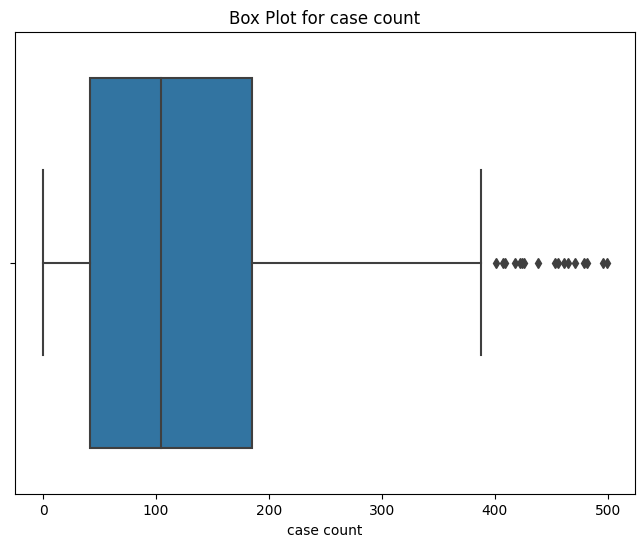

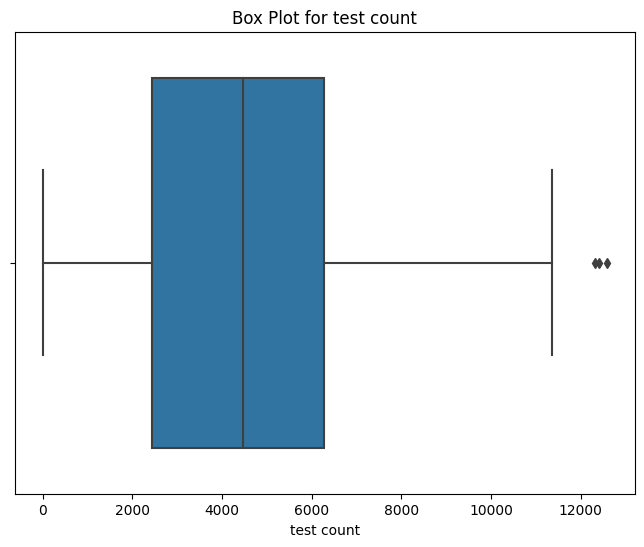

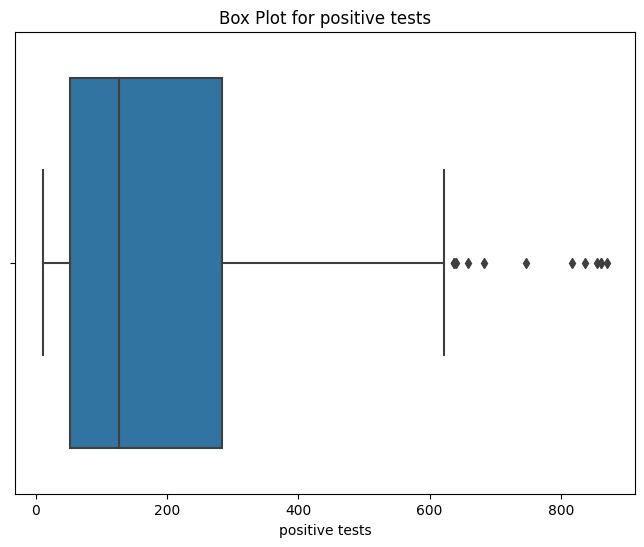

In [ ]:
for column in columns_of_interest:
    plot_box_plot(column)
    remove_outliers_median(column)
    # OR
    # remove_outliers_median(column)

## After Treating the outliers :

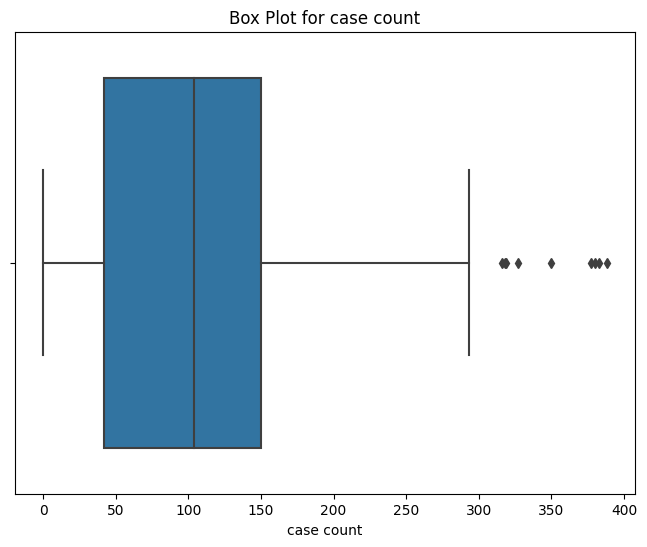

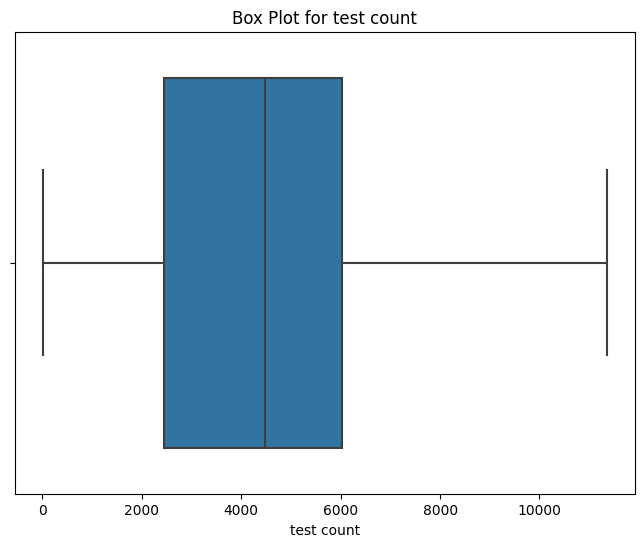

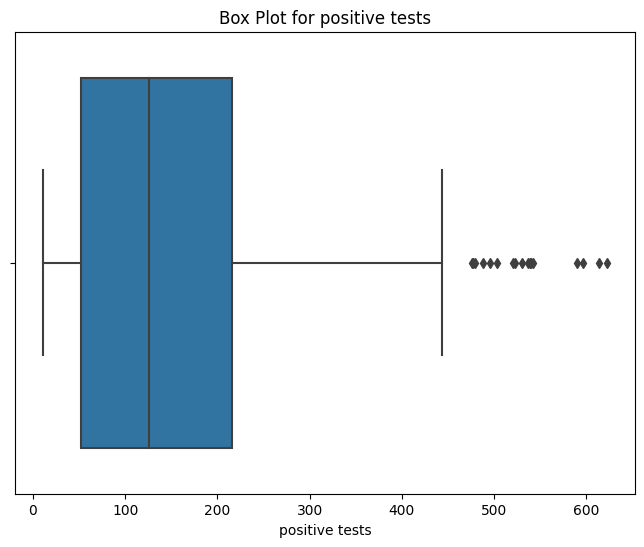

In [ ]:
for column in columns_of_interest:
    plot_box_plot(column)

In [ ]:
import warnings
import os
warnings.filterwarnings('ignore')

# Fixing Dates formats

In [ ]:
import pandas as pd
from datetime import datetime
from dateutil import parser


rows_to_delete = dataset[dataset['time_period'] == 20].index
dataset.drop(rows_to_delete, inplace=True)
def get_startyear(time_period, dataset):
    # Filter the dataset based on the given time_period
    filtered_dataset = dataset[dataset['time_period'] == time_period]

    # Extract the year from the filtered dataset
    filtered_dataset['Start date'] = pd.to_datetime(filtered_dataset['Start date'], format='%m/%d/%Y', errors='coerce')

    # Extract the year from "Start date"
    start_year= int(filtered_dataset['Start date'].dt.year.iloc[0])


    # Return the extracted year
    return start_year
def get_endyear(time_period, dataset):
    # Filter the dataset based on the given time_period
    filtered_dataset = dataset[dataset['time_period'] == time_period]

    # Extract the year from the filtered dataset

    filtered_dataset['end date'] = pd.to_datetime(filtered_dataset['end date'], format='%m/%d/%Y', errors='coerce')

    # Extract the year from "end date"
    end_year= int(filtered_dataset['end date'].dt.year.iloc[0])

    # Return the extracted years
    return end_year

print(get_startyear(18, dataset))

def change_date_format(day_month_str, time_period, dataset, start):
    if start == 1:
        year = get_startyear(time_period, dataset)
    else:
        year = get_endyear(time_period, dataset)

    date_str = f'{day_month_str}-{year}'

    # Convert the combined string to a datetime object
    date_object = datetime.strptime(date_str, '%d-%b-%Y')

    # Format the datetime object as mm/dd/yyyy
    new_date_str = date_object.strftime('%m/%d/%Y')

    return new_date_str


def fix_date_format(dataset):
     for index, row in dataset.iterrows():
        # Check if the date is not in the correct format (doesn't contain "/")
        if "/" not in str(row['Start date']):
            # Update the format using change_date_format function
            dataset.at[index, 'Start date'] = change_date_format(row['Start date'], row['time_period'], dataset, start=1)

        if "/" not in str(row['end date']):
            # Update the format using change_date_format function
            dataset.at[index, 'end date'] = change_date_format(row['end date'], row['time_period'], dataset, start=0)

     return dataset


df=fix_date_format(dataset)
df




2019


,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.000000,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,5/30/2021,6/19/2021,225.987138,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,3/28/2021,4/17/2021,34.000000,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2/6/2022,2/26/2022,110.000000,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,6/20/2021,7/10/2021,14.000000,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,05/01/2022,05/21/2022,165.000000,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,07/24/2022,08/13/2022,150.000000,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,06/12/2022,07/02/2022,219.000000,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,06/28/2020,07/18/2020,53.000000,1379.0,61.0,10.9,282.8,4.4


# Visualization

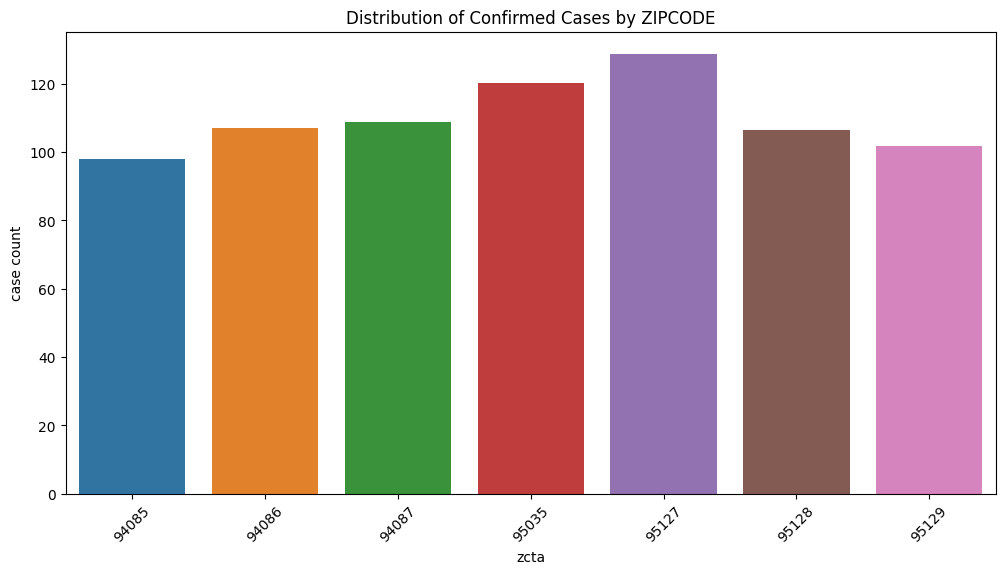

In [ ]:
# - Distribution of the number of confirmed cases and positive tests by ZIPCODE
plt.figure(figsize=(12, 6))
sns.barplot(x='zcta', y='case count', data=df, ci=None)
plt.title('Distribution of Confirmed Cases by ZIPCODE')
plt.xticks(rotation=45)
plt.show()

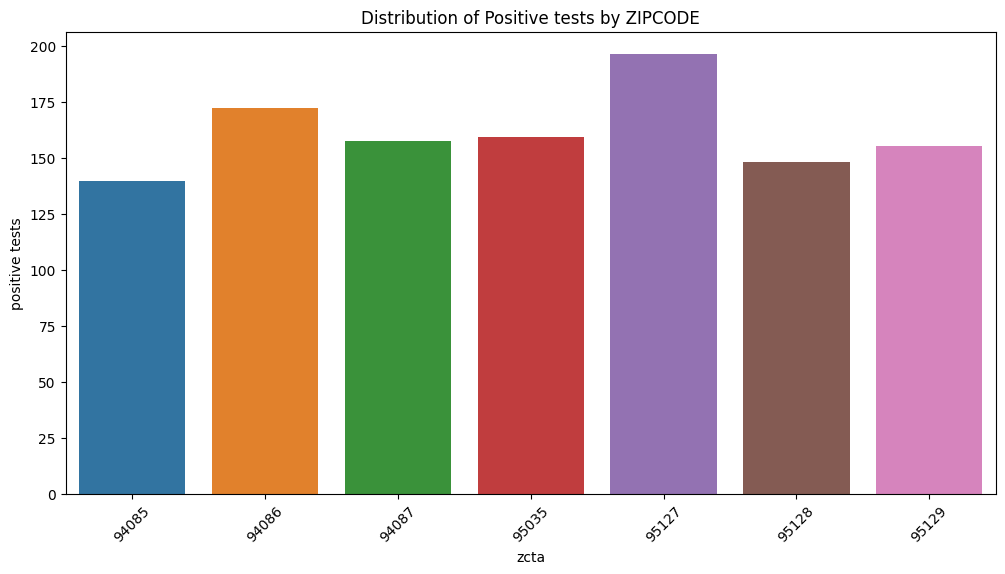

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='zcta', y='positive tests', data=df, ci=None)
plt.title('Distribution of Positive tests by ZIPCODE')
plt.xticks(rotation=45)
plt.show()

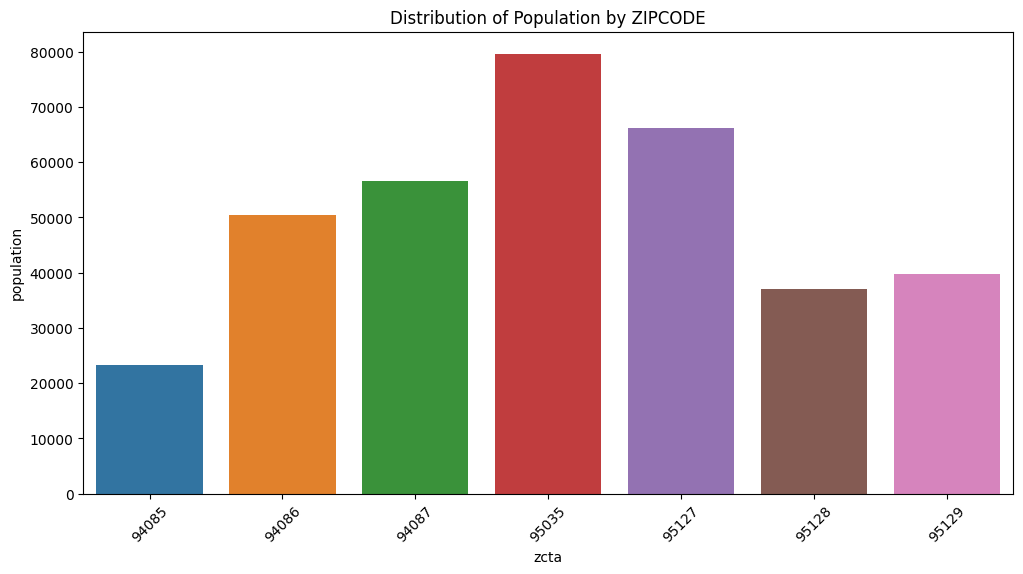

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='zcta', y='population', data=df, ci=None)
plt.title('Distribution of Population by ZIPCODE')
plt.xticks(rotation=45)
plt.show()

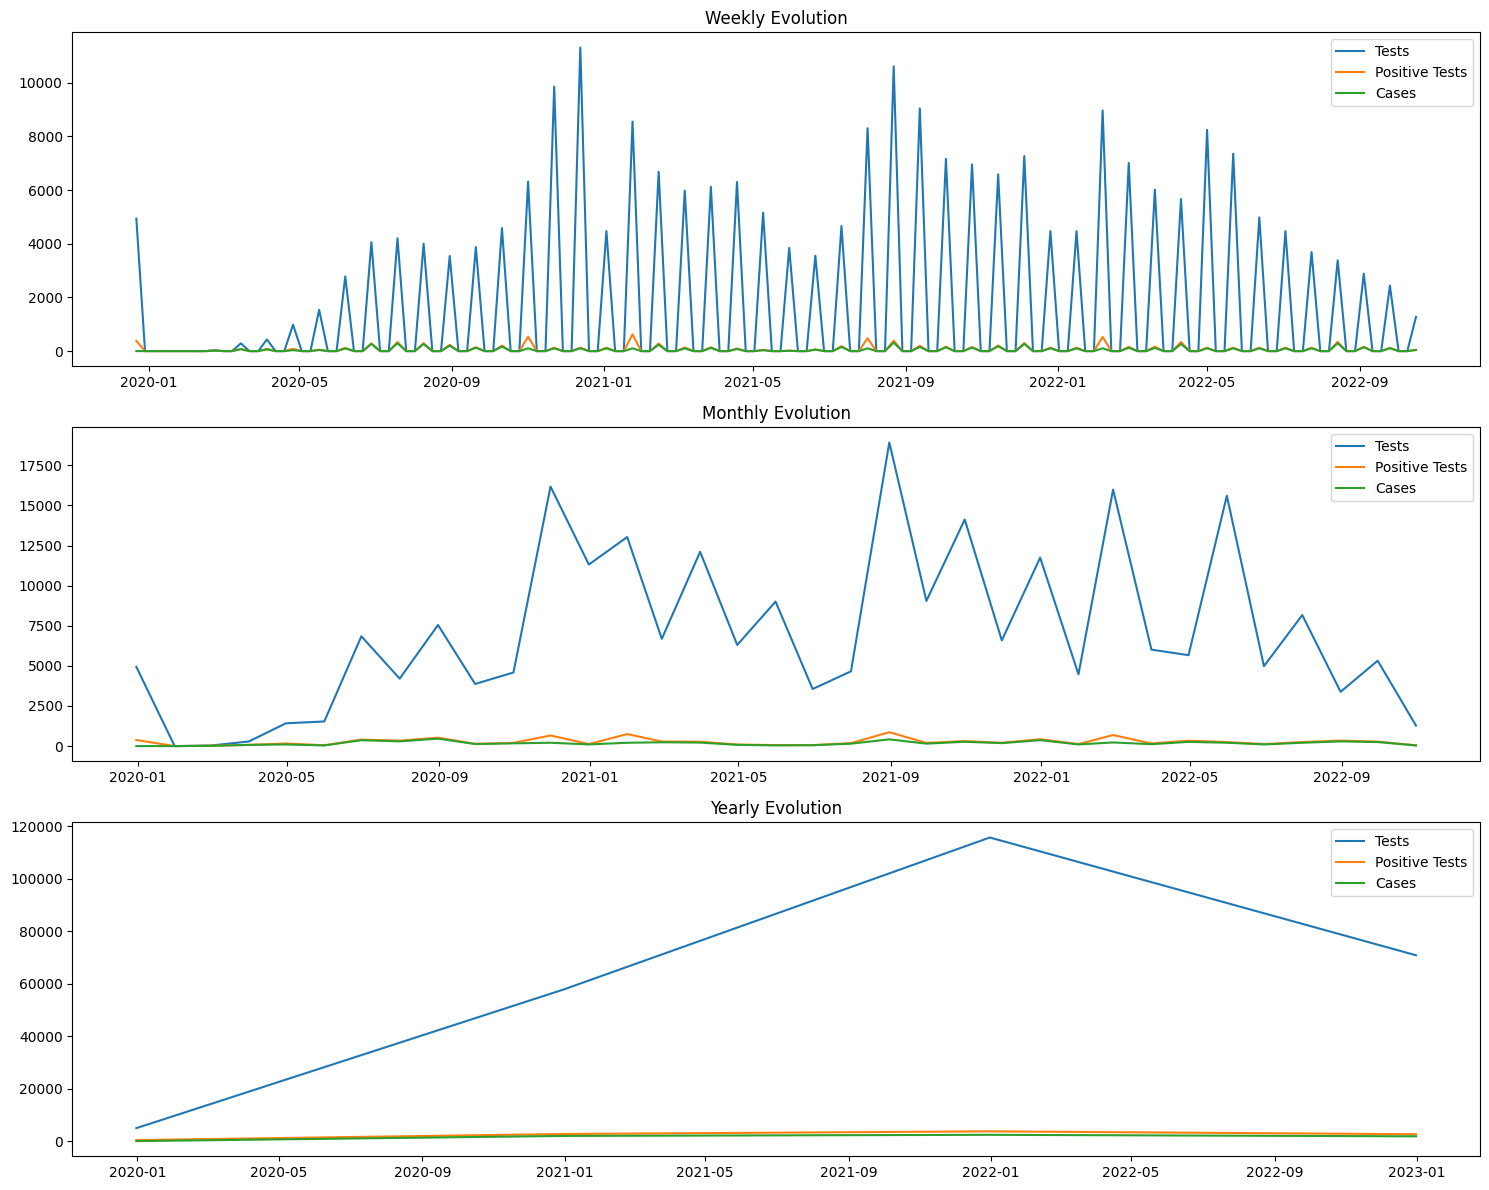

In [ ]:
# - How COVID-19 tests, positive tests, and cases evolve over time for a chosen zone
chosen_zone = 95127
# Convert date columns to datetime type
df['Start date'] = pd.to_datetime(df['Start date'])
df['end date'] = pd.to_datetime(df['end date'])

# Filter data for the chosen zone
zone_df = df[df['zcta'] == chosen_zone]

# Set the 'Start date' column as the index for time-based plotting
zone_df.set_index('Start date', inplace=True)

# Daily evolution
daily_evolution = zone_df.resample('W').sum()

# Monthly evolution
monthly_evolution = zone_df.resample('M').sum()

# Yearly evolution
yearly_evolution = zone_df.resample('Y').sum()

# Plotting
plt.figure(figsize=(15, 12))

# Daily
plt.subplot(3, 1, 1)
plt.plot(daily_evolution.index, daily_evolution['test count'], label='Tests')
plt.plot(daily_evolution.index, daily_evolution['positive tests'], label='Positive Tests')
plt.plot(daily_evolution.index, daily_evolution['case count'], label='Cases')
plt.title('Weekly Evolution')
plt.legend()

# Monthly
plt.subplot(3, 1, 2)
plt.plot(monthly_evolution.index, monthly_evolution['test count'], label='Tests')
plt.plot(monthly_evolution.index, monthly_evolution['positive tests'], label='Positive Tests')
plt.plot(monthly_evolution.index, monthly_evolution['case count'], label='Cases')
plt.title('Monthly Evolution')
plt.legend()

# Yearly
plt.subplot(3, 1, 3)
plt.plot(yearly_evolution.index, yearly_evolution['test count'], label='Tests')
plt.plot(yearly_evolution.index, yearly_evolution['positive tests'], label='Positive Tests')
plt.plot(yearly_evolution.index, yearly_evolution['case count'], label='Cases')
plt.title('Yearly Evolution')
plt.legend()

plt.tight_layout()
plt.show()

We notice that there s a high increase of tests conducted around the first months of year 2022 which probably back to the increase of awarness

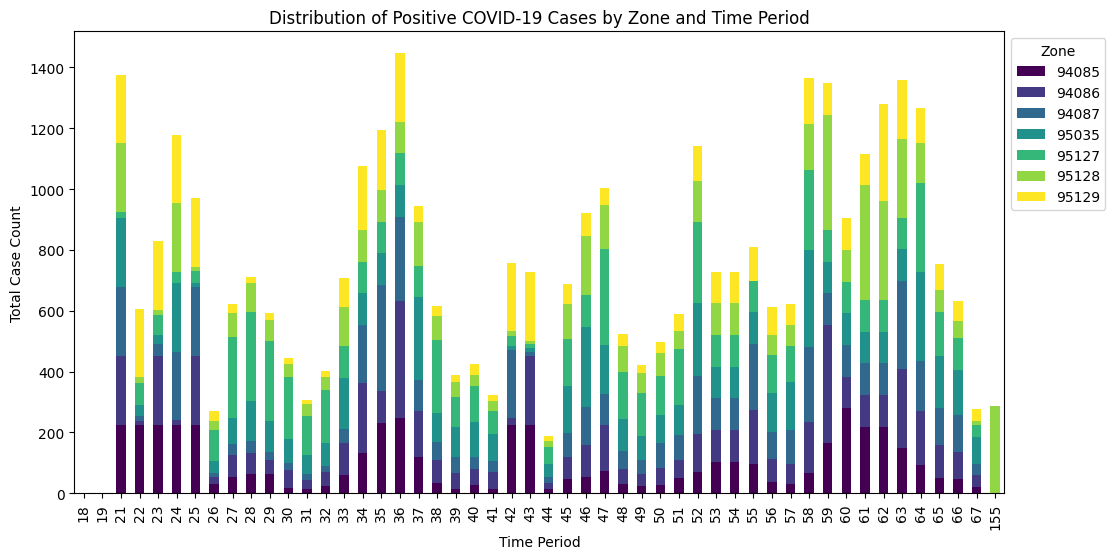

In [ ]:
# - Distribution of positive COVID-19 cases by zone and year
# Group by zone and time period, summing the case count for each period
grouped_df = df.groupby(['zcta', 'time_period'])['case count'].sum().reset_index()

# Pivot the DataFrame to create a format suitable for a stacked bar chart
pivot_df = grouped_df.pivot(index='time_period', columns='zcta', values='case count').fillna(0)

# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Adding labels and title
plt.xlabel('Time Period')
plt.ylabel('Total Case Count')
plt.title('Distribution of Positive COVID-19 Cases by Zone and Time Period')

# Adding a legend
plt.legend(title='Zone', bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()
plt.show()

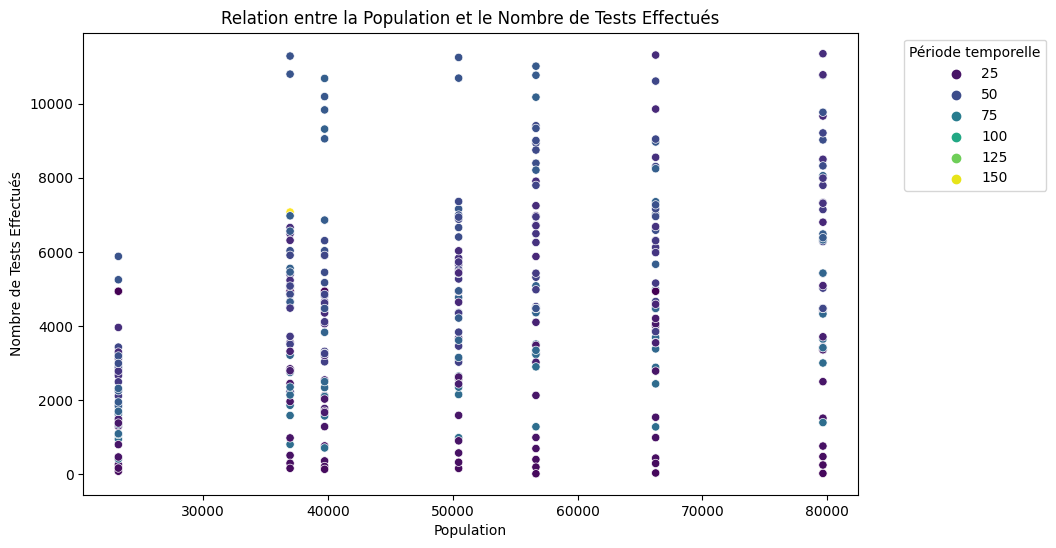

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='test count', data=df, hue='time_period', palette='viridis')

# Ajouter des titres et des étiquettes
plt.title('Relation entre la Population et le Nombre de Tests Effectués')
plt.xlabel('Population')
plt.ylabel('Nombre de Tests Effectués')

# Afficher la légende
plt.legend(title='Période temporelle', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.show()

In [ ]:
df['Start date'] = pd.to_datetime(df['Start date'])
df['end date'] = pd.to_datetime(df['end date'])

# Group by zone and calculate case count per population
grouped_df = df.groupby('zcta').agg({
    'case count': 'sum',
    'population': 'max'
}).reset_index()

# Calculate case count per population
grouped_df['case_count_per_population'] = grouped_df['case count'] / grouped_df['population']

# Sort by case count per population in descending order
sorted_df = grouped_df.sort_values(by='case_count_per_population', ascending=False).head(5)

# Creating a tree map
fig = px.treemap(
    sorted_df,
    path=['zcta'],
    values='case_count_per_population',
    title='Top 5 Zones Most Impacted by COVID-19 (Case Count per Population)',
    labels={'zcta': 'Zone', 'case_count_per_population': 'Case Count per Population'},
    color='case_count_per_population'
)

# Updating layout
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=40),
    coloraxis_colorbar=dict(title='Population to case count'),

)

# Show the tree map
fig.show()

In [ ]:
df

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate,population_tests_ratio,population_cases_ratio
0,95129,32,39741,2020-10-11,2020-10-31,22.000000,2543.0,23.0,2.6,304.7,0.9,15.627605,1806.409091
1,95129,43,39741,2021-05-30,2021-06-19,225.987138,3315.0,14.0,1.1,397.2,0.4,11.988235,175.855141
2,95129,40,39741,2021-03-28,2021-04-17,34.000000,4816.0,37.0,4.1,577.1,0.8,8.251869,1168.852941
3,95129,55,39741,2022-02-06,2022-02-26,110.000000,10194.0,175.0,13.2,1221.5,1.7,3.898470,361.281818
4,95129,44,39741,2021-06-20,2021-07-10,14.000000,3033.0,17.0,1.7,363.4,0.6,13.102868,2838.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,2022-05-01,2022-05-21,165.000000,2315.0,192.0,33.8,474.7,8.3,10.031533,140.745455
333,94085,63,23223,2022-07-24,2022-08-13,150.000000,1348.0,190.0,30.8,276.4,14.1,17.227745,154.820000
334,94085,61,23223,2022-06-12,2022-07-02,219.000000,1696.0,255.0,44.9,347.8,15.0,13.692807,106.041096
335,94085,27,23223,2020-06-28,2020-07-18,53.000000,1379.0,61.0,10.9,282.8,4.4,16.840464,438.169811


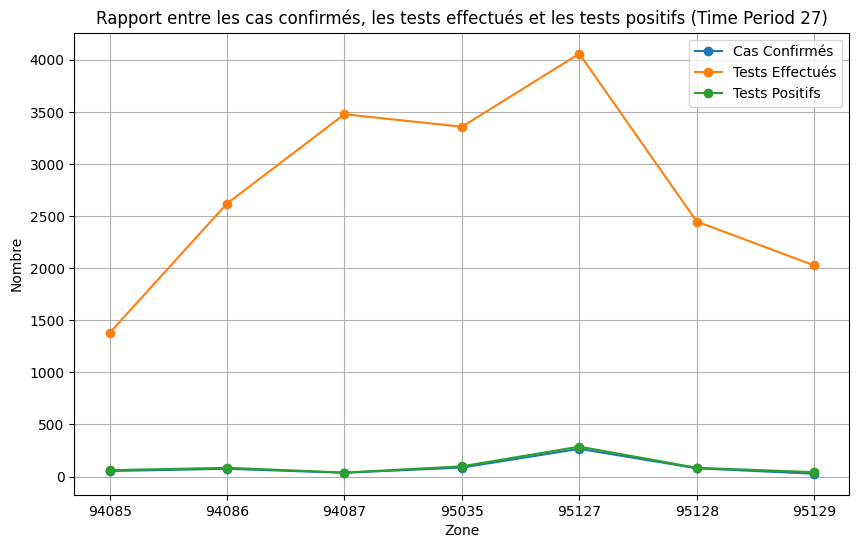

In [ ]:
# Filtrer le DataFrame pour la période de temps 27
df_time_period_27 = df[df['time_period'] == 27]

# Grouper par zone et calculer les moyennes pour chaque colonne
df_grouped = df_time_period_27.groupby('zcta').mean()

# Tracer le rapport entre les cas confirmés, les tests effectués et les tests positifs
plt.figure(figsize=(10, 6))

# Cas confirmés
plt.plot(df_grouped.index, df_grouped['case count'], label='Cas Confirmés', marker='o')

# Tests effectués
plt.plot(df_grouped.index, df_grouped['test count'], label='Tests Effectués', marker='o')

# Tests positifs
plt.plot(df_grouped.index, df_grouped['positive tests'], label='Tests Positifs', marker='o')

# Ajouter des légendes et des titres
plt.xlabel('Zone')
plt.ylabel('Nombre')
plt.title('Rapport entre les cas confirmés, les tests effectués et les tests positifs (Time Period 27)')
plt.legend()
plt.grid(True)
plt.show()